Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

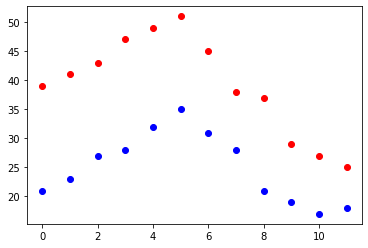

In [67]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)

plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')

In [68]:
days = np.linspace(0, 12, num=365)

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
from scipy import optimize
def yearly_temps(days, avg, ampl, time_offset):
    return (avg + ampl * np.cos((days + time_offset) * 2 * np.pi / days.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

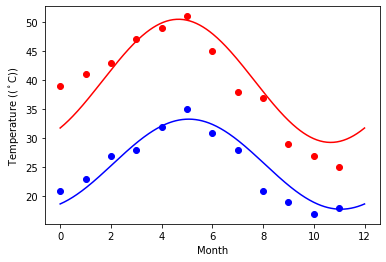

In [70]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (($^\circ$C))')

plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
df.sex.unique()

array([2, 1, nan], dtype=object)

In [0]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Text(0.5, 1.0, 'Male/Female Proportion')

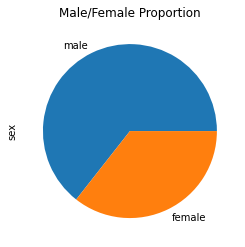

In [19]:
#df['survived'].value_counts()
df['sex'].value_counts().plot(kind='pie');
plt.title('Male/Female Proportion')

Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [38]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [0]:
df = df[df['sex'].notna()]

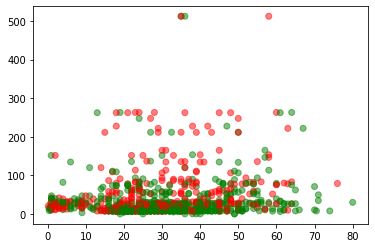

In [65]:
mapping = {'male' : 'green', 'female' : 'red'}
plt.scatter(df['age'], df['fare'], alpha=0.5, c=df['sex'].map(mapping))

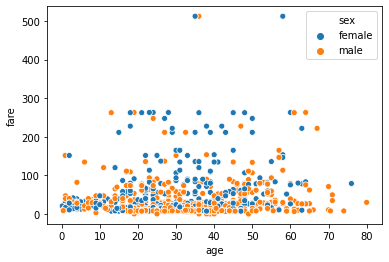

In [63]:
sns.scatterplot(x=df['age'],y=df['fare'],hue=df['sex'])